# [LAB10] 6.독립 표본 T-검정 (이표본 검정 Independent two sample T-test)

서로 다른 두개의 그룹간 평균의 차이가 유의의한지 여부를 판단한다
데이터의 정규성과 등분산성을 만족해야 신뢰할 수 있는 결과를 얻을 수 있다


*statannotations 쓰려면 melt 써야함



*정규성이 false 나온 컬럼에는 log 
levene 평균 > 중앙값으로 많이 함 (기본값)



### #01.준비작업
#### [1] 패키지 참조
statannotations 패키지가 필요하다


In [1]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
from scipy.stats import t, normaltest, bartlett, levene, ttest_ind
from statannotations.Annotator import Annotator

#### [2] 그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

### #02.예제(1) - 지혈제 효과 비교
두 종료의 지혈제 효과를 측정한 자료이다.실험 참가자를 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정하였다.지혈제에 따른 지혈시간이 유의미한 차이가 있는지 확인하라.
단, 모든 데이터는 정규성을 충족한다고 가정한다.

In [4]:
origin = load_data ('styptic')
origin

[data] https://data.hossam.kr/data/lab10_/styptic.xlsx
[desc] 실험 참가자를 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정한 두 종료의 지혈제 효과를 측정한 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,B,G
0,8.80,9.9
1,8.90,10.0
2,8.40,9.0
3,7.90,11.1
4,8.20,9.8
5,8.70,9.6
6,7.90,10.3
7,9.10,8.7
8,9.60,10.4
9,8.75,9.5


#### [2] 신뢰구간 확인
두 그룹의 데이터 분포와 신뢰구간을 확인한다

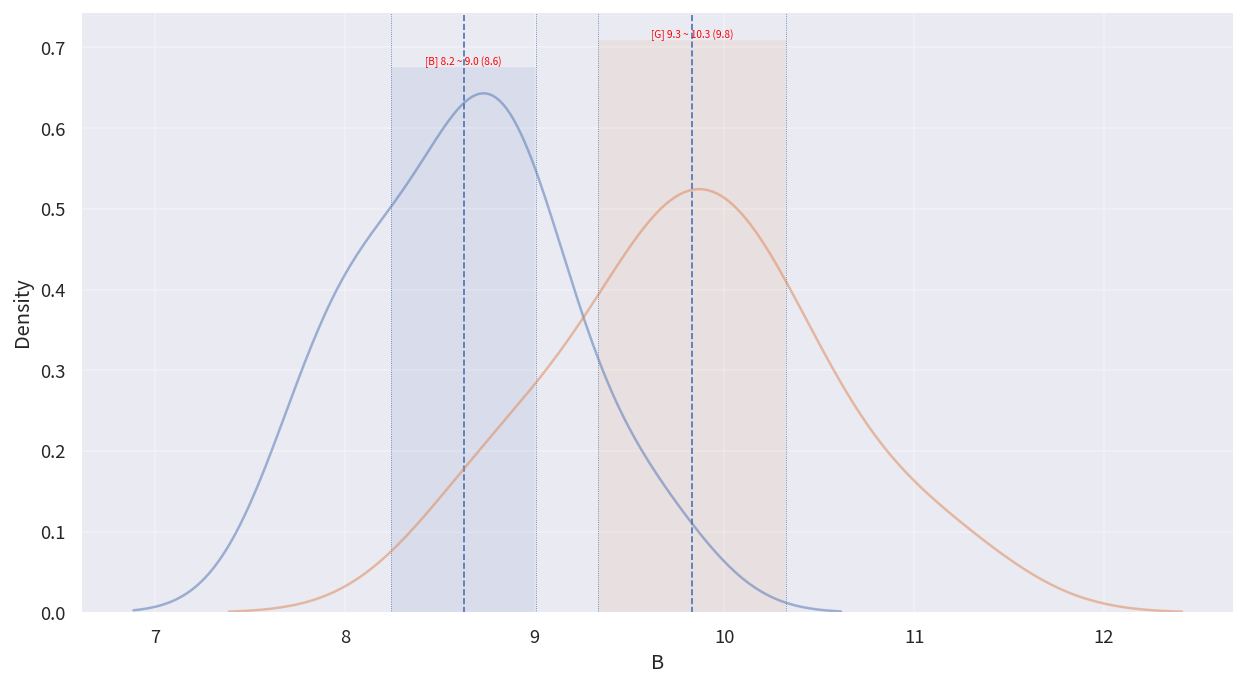

In [5]:
data = origin[['B','G']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


> 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있따. 또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다

#### [3] 가설검정의 가정 확인

In [7]:
data = origin[['B','G']]                      # 검사하려는 데이터 추출

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:

    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"                      # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)     # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                        # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median')   # 모든 컬럼 데이터 전달

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df



,statistic,p-value,result
field,,,
B,0.083269,0.959221,True
G,0.200950,0.904408,True
Bartlett,0.555515,0.456073,True


> 정규성과 등분산성을 모두 충족한다, 이표본 검정 t test 진행해도 무방하다

#### [4] 두 그룹간 지혈 시간 평균에 차이가 있는지 검정

 | 구분           | 수식          | 내용                         |
|----------------|---------------|------------------------------|
| B 그룹의 평균  | μ(B)          |                              |
| G 그룹의 평균  | μ(G)          |                              |
| 귀무가설(H₀)   | μ(B) = μ(G)   | 두 그룹의 지혈 시간 평균은 차이가 없다. |

| 구분           | 수식          | 내용                         |
|----------------|---------------|------------------------------|
| 대립가설(H₁)   | μ(B) ≠ μ(G)   | 두 그룹의 지혈 시간 평균은 차이가 있다. |



두 그룹간의 평균을 비교하기 위해서는 ttest_ind 메서드를 사용한다
alternative 파라미터에 따라 비교 내용이 달라진다
내용은 대립가설에 따라 결정된다

| 값        | 설명                                       |
|-----------|--------------------------------------------|
| two-sided | 두 그룹의 평균이 같은지를 판단한다(기본값). |
| greater   | 두 그룹 중 첫 번째 그룹의 평균이 더 크지 판단한다. |
| less      | 두 그룹 중 첫 번째 그룹의 평균이 더 작은지 판단한다. |


In [ ]:
s, p = ttest_ind(origin['B'], origin['G'] ) #alternative = 'less' / 'greater' 
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

> p value 가 0.05 보다 작으므로 대립가설이 채택되어 그룹 B,G 간의 평균 지혈시간에는 차이가 있다


#### [5] B 그룹의 평균이 G 그룹 평균보다 더 큰지 검정
| 구분        | 수식          | 내용                                                                 |
|-------------|----------------|----------------------------------------------------------------------|
| 귀무가설(H₀) | μ(B) ≤ μ(G)    | 지혈제 B를 사용한 그룹의 평균 지혈 시간은 G를 사용한 그룹의 평균 지혈 시간보다 크지 않다. |
| 대립가설(H₁) | μ(B) > μ(G)    | 지혈제 B를 사용한 그룹의 평균 지혈 시간은 G를 사용한 그룹의 평균 지혈 시간보다 크다.     |



In [10]:
s, p = ttest_ind(origin['B'], origin['G'] ,alternative = 'greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -4.350, p-value: 1.000, 귀무가설 채택'

> p value 가 0.05 보다 커 귀무가설이 채택되어 지혈제 B 를 사용한 그룹의 평균 지혈 시간이 G 를 사용한 그룹의 평균 지혈 시가놉다 크지 않다는 귀무가설을 기각할 수 없다

#### [6] B 그룹의 평균이 G 그룹 평균보다 더 작은지 검정

| 구분        | 수식          | 내용                                                                 |
|-------------|----------------|----------------------------------------------------------------------|
| 귀무가설(H₀) | μ(B) ≥ μ(G)    | 지혈제 B를 사용한 그룹의 평균 지혈 시간은 G를 사용한 그룹의 평균 지혈 시간보다 크지 않다. |
| 대립가설(H₁) | μ(B) < μ(G)    | 지혈제 B를 사용한 그룹의 평균 지혈 시간은 G를 사용한 그룹의 평균 지혈 시간보다 작다.     |


In [11]:
s, p = ttest_ind(origin['B'], origin['G'] ,alternative = 'less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

#### [6] 가설검정 시각화
- statannotations 패키지의 Annotator 클래스는 seaborn 으로 구현한 그래프에 설명을 추가하는 기능을 제공한다
- 가설검정에 대해서는 영가설이 μ(B) = μ(G) 인 경우만 지원되고 작다, 크다에 대한 경우는 제공되지 않는다.

(1) 데이터 전처리
hue 파라미터를 적용할 수 있는 형태로 데이터 재배치가 필요하다

In [12]:
df = melt(origin, var_name='group', value_name='value')
df

,group,value
0,B,8.80
1,B,8.90
2,B,8.40
3,B,7.90
4,B,8.20
5,B,8.70
6,B,7.90
7,B,9.10
8,B,9.60
9,B,8.75


(2) 시각화 구현

| 파라미터     | 설명 |
|-------------|------|
| ax          | boxplot 객체 |
| data        | 데이터프레임 |
| x           | 명목형 변수 |
| y           | 연속형 변수 |
| pairs       | 비교 대상을 묶은 리스트 |
| test        | 가설검정 알고리즘 종류 (t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney_gt, Mann-Whitney_ls, Levene, Wilcoxon, Kruskal 등을 지원함) |
| text_format | 출력 형식 (full, simple, star)을 지원함 |


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


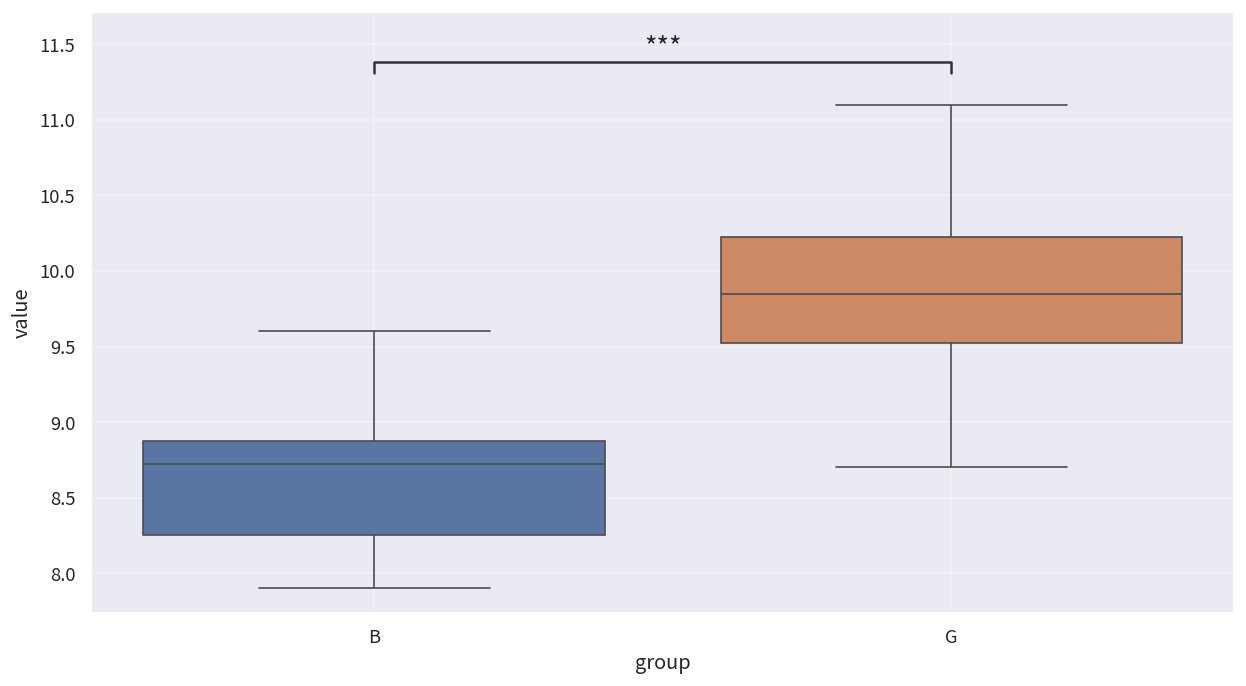

In [13]:
# 1) 그래프 초기화
width_px   = 1280          # 그래프 가로 크기
height_px  = 720           # 그래프 세로 크기
rows = 1                   # 그래프 행 수
cols = 1                   # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')

annotator = Annotator(ax, data=df, x='group', y='value',
                      pairs=[('B', 'G')])
annotator.configure(test='t-test_ind')
annotator.apply_and_annotate()

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)       # 배경 격자 표시

# 4) 출력
plt.tight_layout()             # 여백 제거
plt.show()                     # 그래프 화면 출력
plt.close()                    # 그래프 작업 종료


### #03. 예제(2) - 인공심장 효과 측정
자료는 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 것이다.

그룹1은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들이고,그룹2는 비정상으로 판명된 사람들이다.

심장계수는 수술 직후에 측정하였다.

이 두 그룹의 환자에게 부착한 인공장기의 기능에 따라 심장계수가 서로 차이가 나는지 알고 싶은 것이 이 실험의 목적이다.

#### [1] 데이터 가져오기

In [14]:
origin = load_data('heatrate')
origin

[data] https://data.hossam.kr/data/lab10_/heatrate.xlsx
[desc] 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 데이터. `그룹1`은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들이고, `그룹2`는 비정상으로 판명된 사람들이다.심장계수는 수술 직후에 측정하였다. (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,그룹1,그룹2
0,3.84,3.97
1,2.60,2.50
2,1.19,2.70
3,2.00,3.36
4,6.20,3.55
5,0.96,2.97
6,5.50,3.20
7,3.18,2.30


#### [2] 신뢰구간 확인

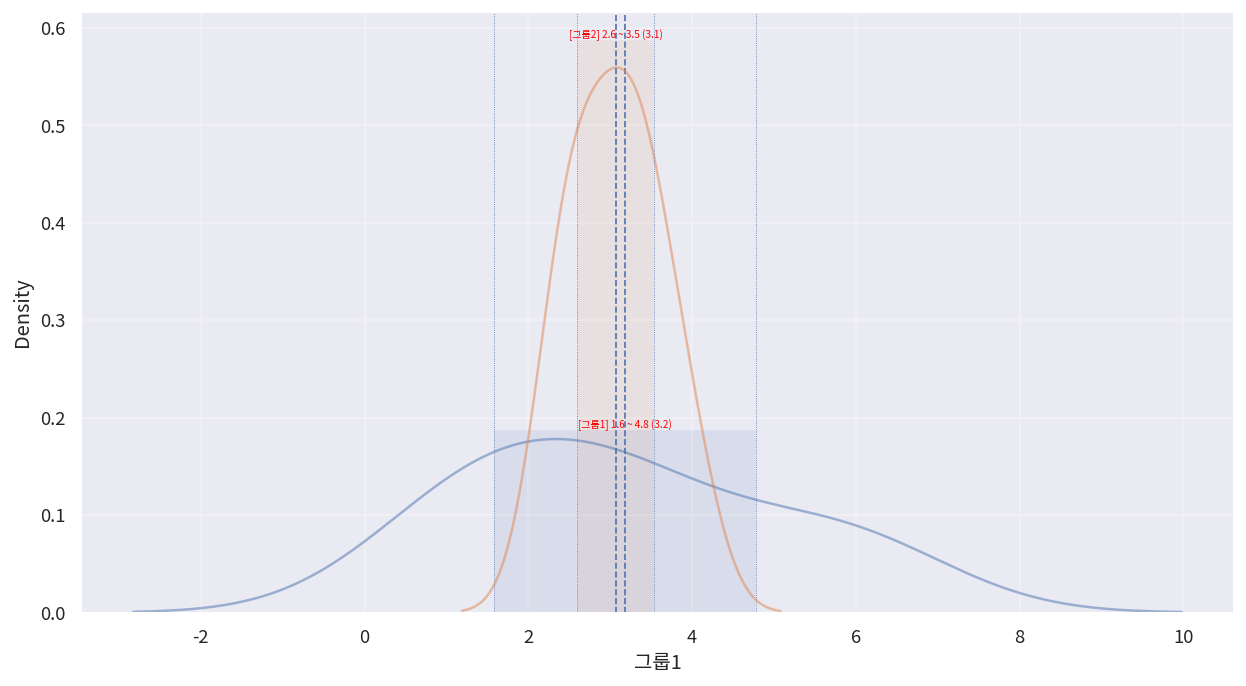

In [16]:
data = origin[['그룹1','그룹2']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


> 두 그룹의 데이터 분포가 다른 것을 확인
> 두 그룹의 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상 범위에 있다고 할 수 있음


#### [3] 가설검정의 가정 확인

In [17]:
data = origin[['그룹1','그룹2']]                      # 검사하려는 데이터 추출

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:

    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"                      # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)     # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                        # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center='median')   # 모든 컬럼 데이터 전달

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df


,statistic,p-value,result
field,,,
그룹1,0.839625,0.657170,True
그룹2,0.260764,0.877760,True
Bartlett,8.029088,0.004603,False


> 정규성은 만족하지만 등분산성은 만족하지 않는다 > Welch's T test 를 수행한다

#### [4] 두 그룹간 심장계쑤의 차이가 있는지를 검정
데이터의 등분산성이 만족되지 않을 경우 Welch's T test 를 수행하기 위해 equal_var 파라미터에 False 를 설정한다 (기본값 = True)

| 구분         | 수식        | 내용                                   |
|--------------|-------------|----------------------------------------|
| 그룹1의 평균 | μ(1)        |                                        |
| 그룹2의 평균 | μ(2)        |                                        |
| 귀무가설(H₀) | μ(1) = μ(2) | 두 그룹의 심장계수 평균은 차이가 없다. |
| 대립가설(H₁) | μ(1) ≠ μ(2) | 두 그룹의 심장계수 평균은 차이가 있다. |


In [19]:
s, p = ttest_ind(origin['그룹1'], origin['그룹2'],alternative = 'two-sided') 
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.163, p-value: 0.873, 귀무가설 채택'

> p-value가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다. 즉, 두 그룹의 심장 계수가 다르다고 판단할 근거가 없다.

#### [5] 그룹1의 심장계수가 그룹2의 심장계수보다 작은지 검정

| 구분         | 수식          | 내용                                          |
|--------------|---------------|-----------------------------------------------|
| 귀무가설(H₀) | μ(1) ≥ μ(2)    | 그룹1의 심장계수는 그룹2의 심장계수보다 작지 않다. |
| 대립가설(H₁) | μ(1) < μ(2)    | 그룹1의 심장계수는 그룹2의 심장계수보다 작다.       |


In [20]:
s, p = ttest_ind(origin['그룹1'], origin['그룹2'],alternative = 'less') 
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.163, p-value: 0.564, 귀무가설 채택'

p-value가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다. 즉, 그룹1의 심장계수는 그룹2의 심장계수보다 작지 않다.

#### [6] 그룹1의 심장계수가 그룹2의 심장계수보다 큰지 검정

| 구분         | 수식         | 내용                                              |
|--------------|--------------|---------------------------------------------------|
| 귀무가설(H₀) | μ(1) ≤ μ(2)   | 그룹1의 심장계수는 그룹2의 심장계수보다 크지 않다. |
| 대립가설(H₁) | μ(1) > μ(2)   | 그룹1의 심장계수는 그룹2의 심장계수보다 크다.       |


In [21]:
s, p = ttest_ind(origin['그룹1'], origin['그룹2'],alternative = 'greater') 
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.163, p-value: 0.436, 귀무가설 채택'

#### [7] 가설검정 시각화 

statannotations 라이브러리는 Welch's T-Test를 직접 지원하기 때문에 테스트 함수의 이름만 변경하고, 그 외 시각화 코드에서 추가적으로 처리해야 할 부분은 없다.

In [22]:
df = melt(origin, var_name='group', value_name='value')
df

,group,value
0,그룹1,3.84
1,그룹1,2.60
2,그룹1,1.19
3,그룹1,2.00
4,그룹1,6.20
5,그룹1,0.96
6,그룹1,5.50
7,그룹1,3.18
8,그룹2,3.97
9,그룹2,2.50


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

그룹1 vs. 그룹2: Welch's t-test independent samples, P_val:8.742e-01 t=1.633e-01


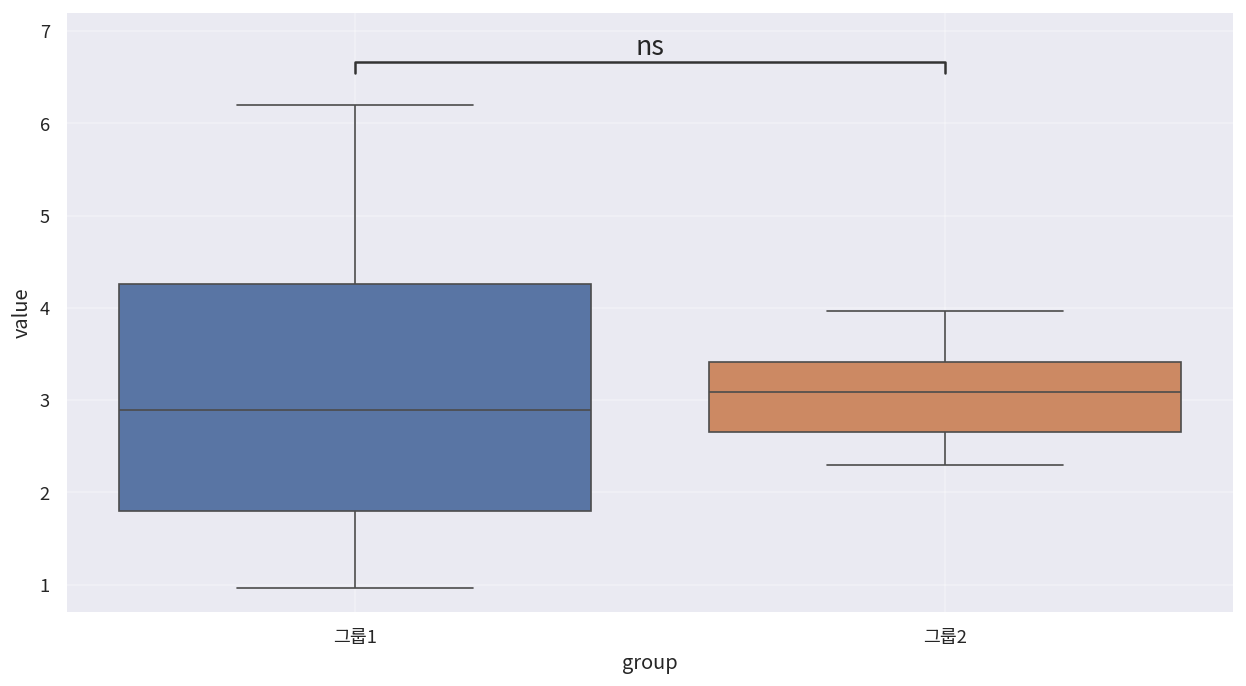

In [23]:
# 1) 그래프 초기화
width_px   = 1280          # 그래프 가로 크기
height_px  = 720           # 그래프 세로 크기
rows = 1                   # 그래프 행 수
cols = 1                   # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')

annotator = Annotator(ax, data=df, x='group', y='value',
                      pairs=[('그룹1', '그룹2')])
annotator.configure(test='t-test_welch')
annotator.apply_and_annotate()

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)       # 배경 격자 표시

# 4) 출력
plt.tight_layout()             # 여백 제거
plt.show()                     # 그래프 화면 출력
plt.close()                    # 그래프 작업 종료
